## Unveiling the Android App Market: Analyzing Google Play Store Data

### Table of Contents

- [Introduction](#intro)
- [Data Preparation: Clean and correct data types for accuracy](#datap)
- [Category Exploration: 
Investigate app distribution across categorie](#cat)
- [Metrics Analysis: 
Examine app ratings, size, popularity, and pricing trend](#met)
- [Sentiment Analysis: 
Assess user sentiments through review](#sen)
- [Interactive Visualization: 
Utilize code for compelling visualization](#inte)
- [Skill Enhancement: Integrate insights from the "Understanding Data Visualization" course](#skil)

### Introduction

Clean, categorize, and visualize Google Play Store data to understand app market dynamics. 

Gain in-depth insights into the Android app market by leveraging data analytics,visualization, and enhanced interpretation skills.s.

In [13]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

#### Data Collection

In [14]:
# Loading Dataset
apps_data = pd.read_csv ('C:/Users/CHRIS/Documents/Oasis Infobyte Internship Project/Project 2 of 4/apps.csv')
apps_data

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### Data Preparation

In [3]:
# Checking for information in the Dataset
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [4]:
# Checking for Description of the Dataset
apps_data.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


In [5]:
# Checking for shape in the Dataset
apps_data.shape

(9659, 14)

In [6]:
# Checking for missing values in the Dataset
apps_data.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [18]:
# Checking for Duplicates in the Dataset
apps_data.duplicated().sum()

0

In [7]:
# Checking for data type in the Dataset
apps_data.dtypes

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [40]:
# Ensure the `Installs` column is in string format before using `.str.replace`
if apps_data['Installs'].dtype != 'object':
    apps_data['Installs'] = apps_data['Installs'].astype(str)

# Convert `Installs` to numeric
apps_data['Installs'] = apps_data['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Ensure the `Price` column is in string format before using `.str.replace`
if apps_data['Price'].dtype != 'object':
    apps_data['Price'] = apps_data['Price'].astype(str)

# Now safely apply the `.str.replace` method to remove the dollar sign and convert to float
apps_data['Price'] = apps_data['Price'].str.replace('$', '').astype(float)

# Convert `Last Updated` to datetime
apps_data['Last Updated'] = pd.to_datetime(apps_data['Last Updated'])

# Handle missing values
# Fill missing `Rating` and `Size` values with the mean
apps_data['Rating'] = apps_data['Rating'].fillna(apps_data['Rating'].mean())
apps_data['Size'] = apps_data['Size'].fillna(apps_data['Size'].mean())

# Fill other missing values with 'Unknown'
apps_data.fillna('Unknown', inplace=True)

# Correct data types for columns like `Reviews`
apps_data['Reviews'] = apps_data['Reviews'].astype(int)

# Display the cleaned data info and first few rows
print(apps_data.info())
print(apps_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          9659 non-null   float64       
 3   Reviews         9659 non-null   int32         
 4   Size            9659 non-null   float64       
 5   Installs        9659 non-null   int32         
 6   Type            9659 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9659 non-null   object        
 12  Android Ver     9659 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(7)
memory usage: 905.7+ KB
None
                         

#### Category Exploration

In [45]:
# Count the number of apps in each category
category_distribution = apps_data['Category'].value_counts()

# Print the investigation statement
print("To investigate the app distribution across categories, we can count the number of apps in each category. I'll calculate and display the distribution now.\n")

# Print the distribution of apps across categories
print("The distribution of apps across different categories is as follows:\n")

# Iterate through the distribution and print each category with the count
for category, count in category_distribution.items():
    print(f"{category}: {count} apps")

To investigate the app distribution across categories, we can count the number of apps in each category. I'll calculate and display the distribution now.

The distribution of apps across different categories is as follows:

FAMILY: 1832 apps
GAME: 959 apps
TOOLS: 827 apps
BUSINESS: 420 apps
MEDICAL: 395 apps
PERSONALIZATION: 376 apps
PRODUCTIVITY: 374 apps
LIFESTYLE: 369 apps
FINANCE: 345 apps
SPORTS: 325 apps
COMMUNICATION: 315 apps
HEALTH_AND_FITNESS: 288 apps
PHOTOGRAPHY: 281 apps
NEWS_AND_MAGAZINES: 254 apps
SOCIAL: 239 apps
BOOKS_AND_REFERENCE: 222 apps
TRAVEL_AND_LOCAL: 219 apps
SHOPPING: 202 apps
DATING: 171 apps
VIDEO_PLAYERS: 163 apps
MAPS_AND_NAVIGATION: 131 apps
EDUCATION: 119 apps
FOOD_AND_DRINK: 112 apps
ENTERTAINMENT: 102 apps
AUTO_AND_VEHICLES: 85 apps
LIBRARIES_AND_DEMO: 84 apps
WEATHER: 79 apps
HOUSE_AND_HOME: 74 apps
EVENTS: 64 apps
ART_AND_DESIGN: 64 apps
PARENTING: 60 apps
COMICS: 56 apps
BEAUTY: 53 apps


#### Metrics Analysis

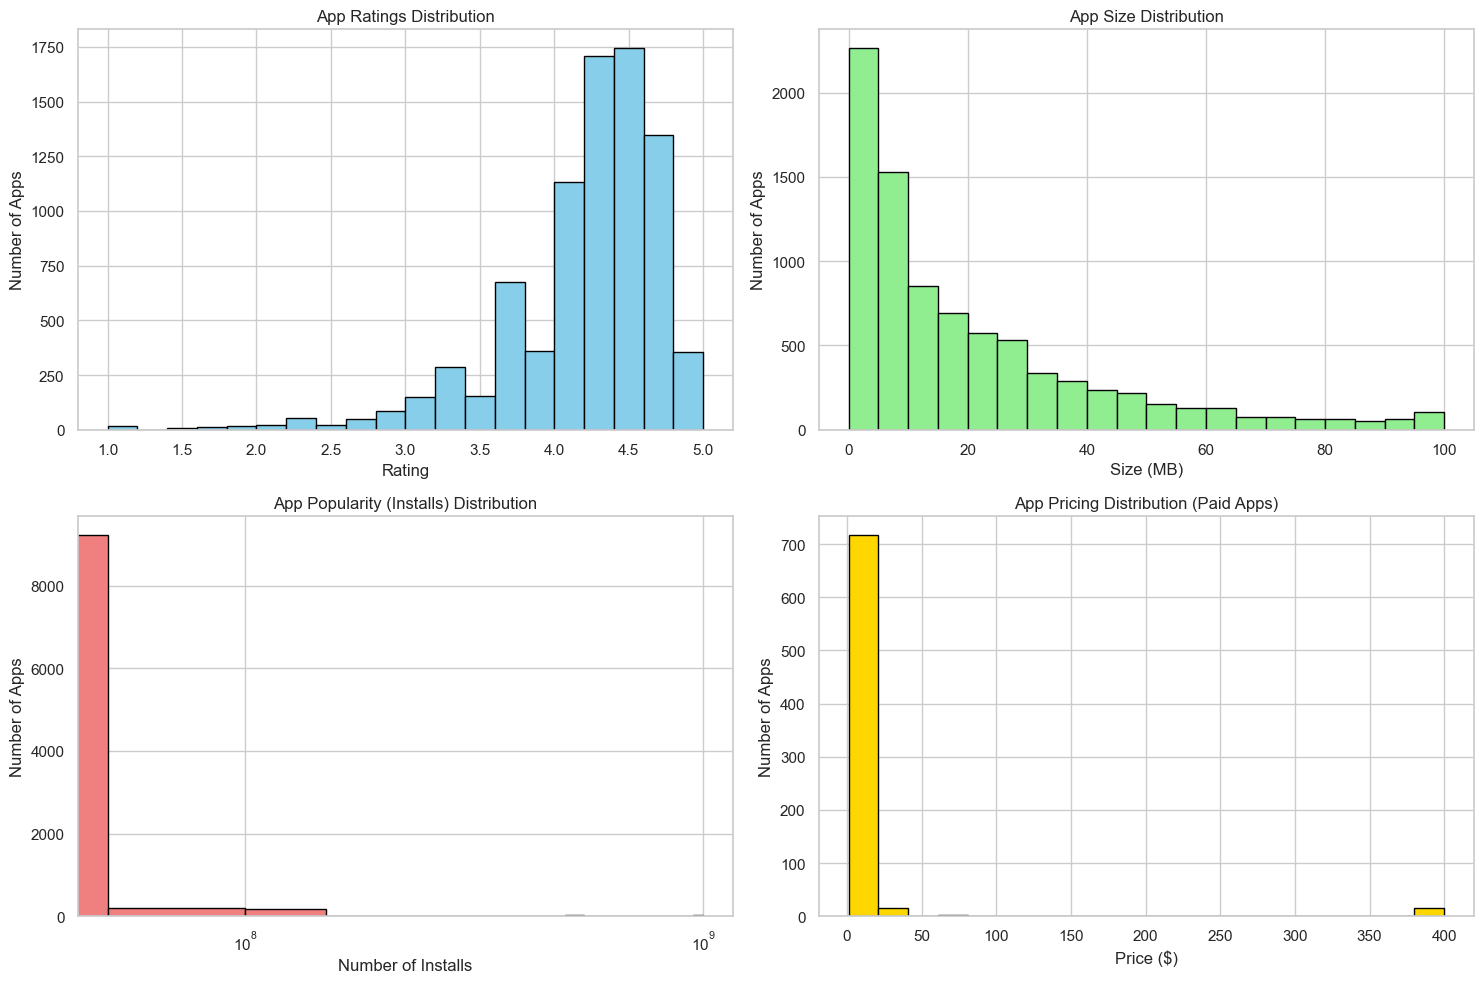

In [52]:
 # Convert necessary columns to appropriate data types
apps_data['Rating'] = pd.to_numeric(apps_data['Rating'], errors='coerce')
apps_data['Size'] = pd.to_numeric(apps_data['Size'], errors='coerce')
apps_data['Installs'] = apps_data['Installs'].replace('[+,]', '', regex=True).astype(int)
apps_data['Price'] = apps_data['Price'].replace(r'[\$,]', '', regex=True).astype(float)

# Examine App Ratings
ratings_distribution = apps_data['Rating'].dropna()

# Examine App Size
size_distribution = apps_data['Size'].dropna()

# Examine Popularity (Installs)
popularity_distribution = apps_data['Installs']

# Examine Pricing Trends
pricing_distribution = apps_data[apps_data['Type'] == 'Paid']['Price']

# Plotting the distributions
plt.figure(figsize=(15, 10))

# Ratings Distribution
plt.subplot(2, 2, 1)
plt.hist(ratings_distribution, bins=20, color='skyblue', edgecolor='black')
plt.title('App Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')

# Size Distribution
plt.subplot(2, 2, 2)
plt.hist(size_distribution, bins=20, color='lightgreen', edgecolor='black')
plt.title('App Size Distribution')
plt.xlabel('Size (MB)')
plt.ylabel('Number of Apps')

# Popularity (Installs) Distribution
plt.subplot(2, 2, 3)
plt.hist(popularity_distribution, bins=20, color='lightcoral', edgecolor='black')
plt.title('App Popularity (Installs) Distribution')
plt.xlabel('Number of Installs')
plt.ylabel('Number of Apps')
plt.xscale('log')  # Use logarithmic scale due to the wide range of installs

# Pricing Distribution
plt.subplot(2, 2, 4)
plt.hist(pricing_distribution, bins=20, color='gold', edgecolor='black')
plt.title('App Pricing Distribution (Paid Apps)')
plt.xlabel('Price ($)')
plt.ylabel('Number of Apps')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#### Sentiment Analysis

In [57]:
# Perform Sentiment Analysis
def analyze_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity

# Applying sentiment analysis on the 'Reviews' 
apps_data['Sentiment'] = apps_data['Reviews'].apply(lambda x: analyze_sentiment(str(x)))

# SAggregate Sentiment Results
# Calculating the average sentiment for each app
average_sentiment = apps_data.groupby('App')['Sentiment'].mean()

# Display the top apps by sentiment
top_positive_apps = average_sentiment.sort_values(ascending=False).head(10)
top_negative_apps = average_sentiment.sort_values().head(10)

# Display the results
print("Top 10 Positive Sentiment Apps:")
print(top_positive_apps)

print("\nTop 10 Negative Sentiment Apps:")
print(top_negative_apps)

Top 10 Positive Sentiment Apps:
App
"i DT" Fútbol. Todos Somos Técnicos.                0.0
My Talking Tom                                      0.0
My Teacher - Classroom Play                         0.0
My Telcel                                           0.0
My Tele2                                            0.0
My Theme Park: RollerCoaster & Water Park Tycoon    0.0
My Truck                                            0.0
My Virtual Boyfriend                                0.0
My Vodacom SA                                       0.0
My Vodafone (GR)                                    0.0
Name: Sentiment, dtype: float64

Top 10 Negative Sentiment Apps:
App
"i DT" Fútbol. Todos Somos Técnicos.                0.0
My Teacher - Classroom Play                         0.0
My Telcel                                           0.0
My Tele2                                            0.0
My Theme Park: RollerCoaster & Water Park Tycoon    0.0
My Truck                                            0.0

#### Interactive Visualization

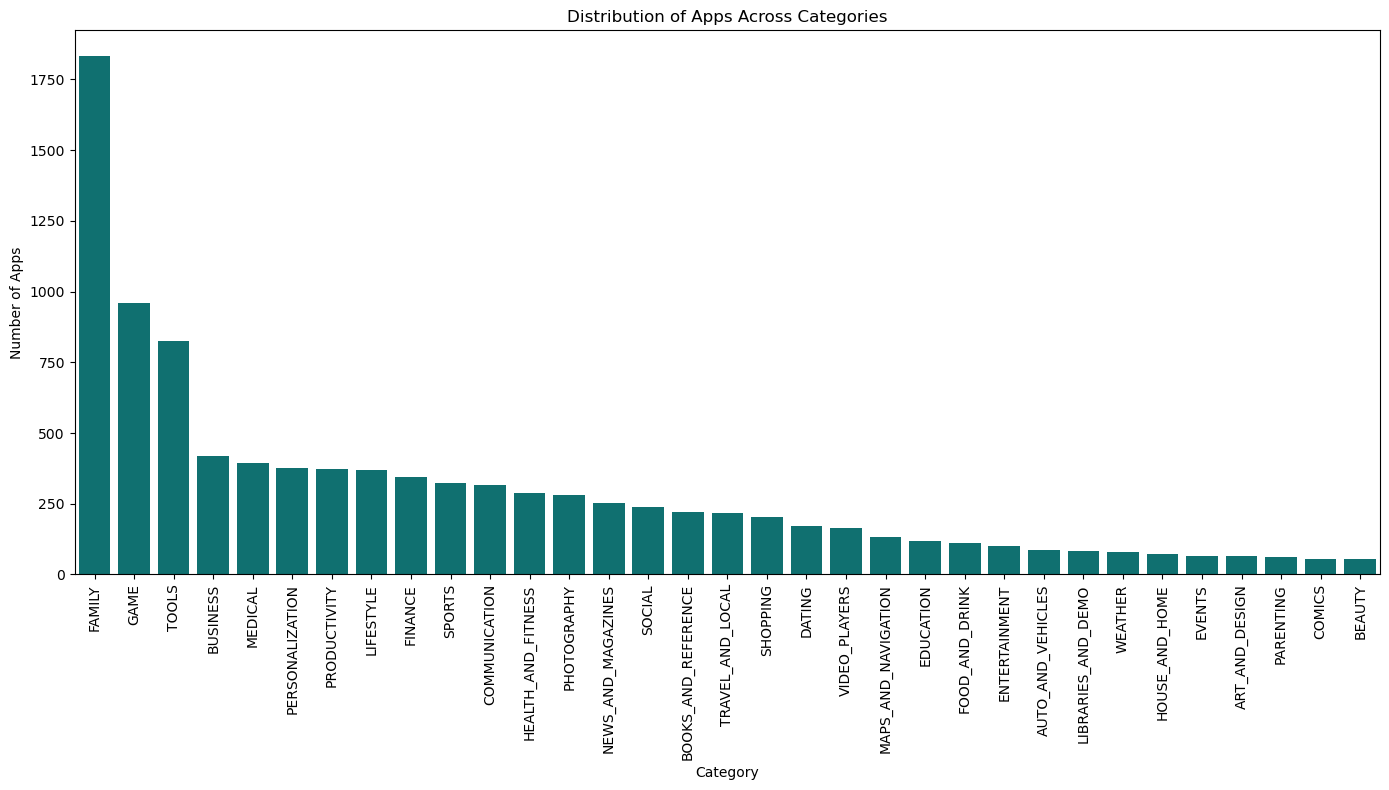

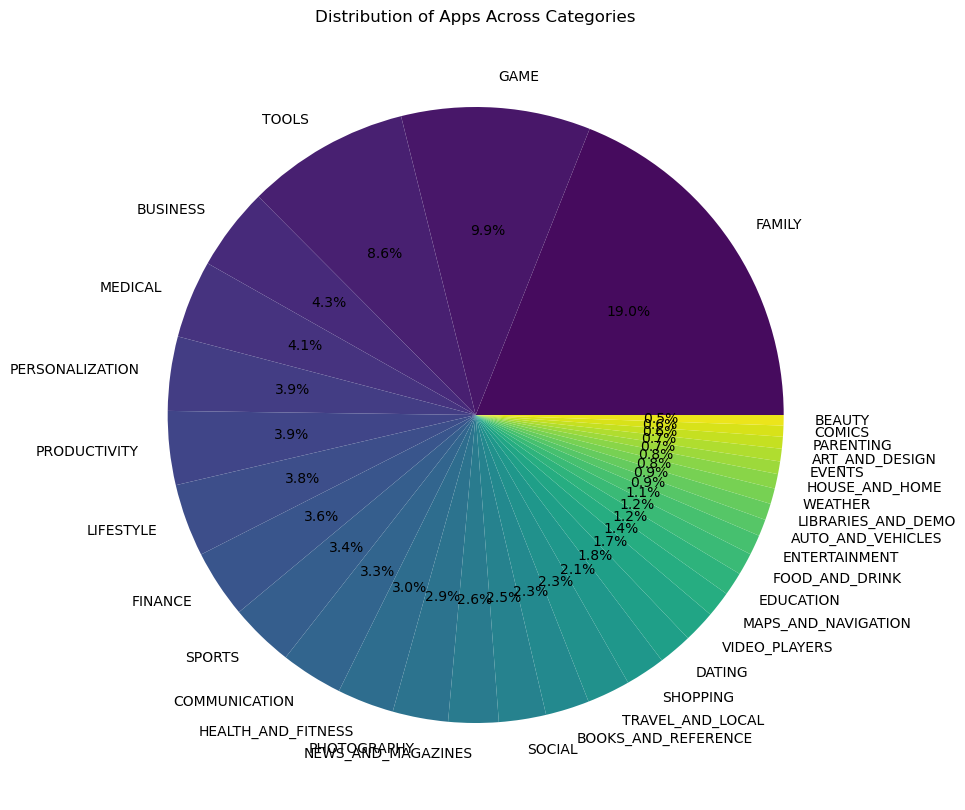

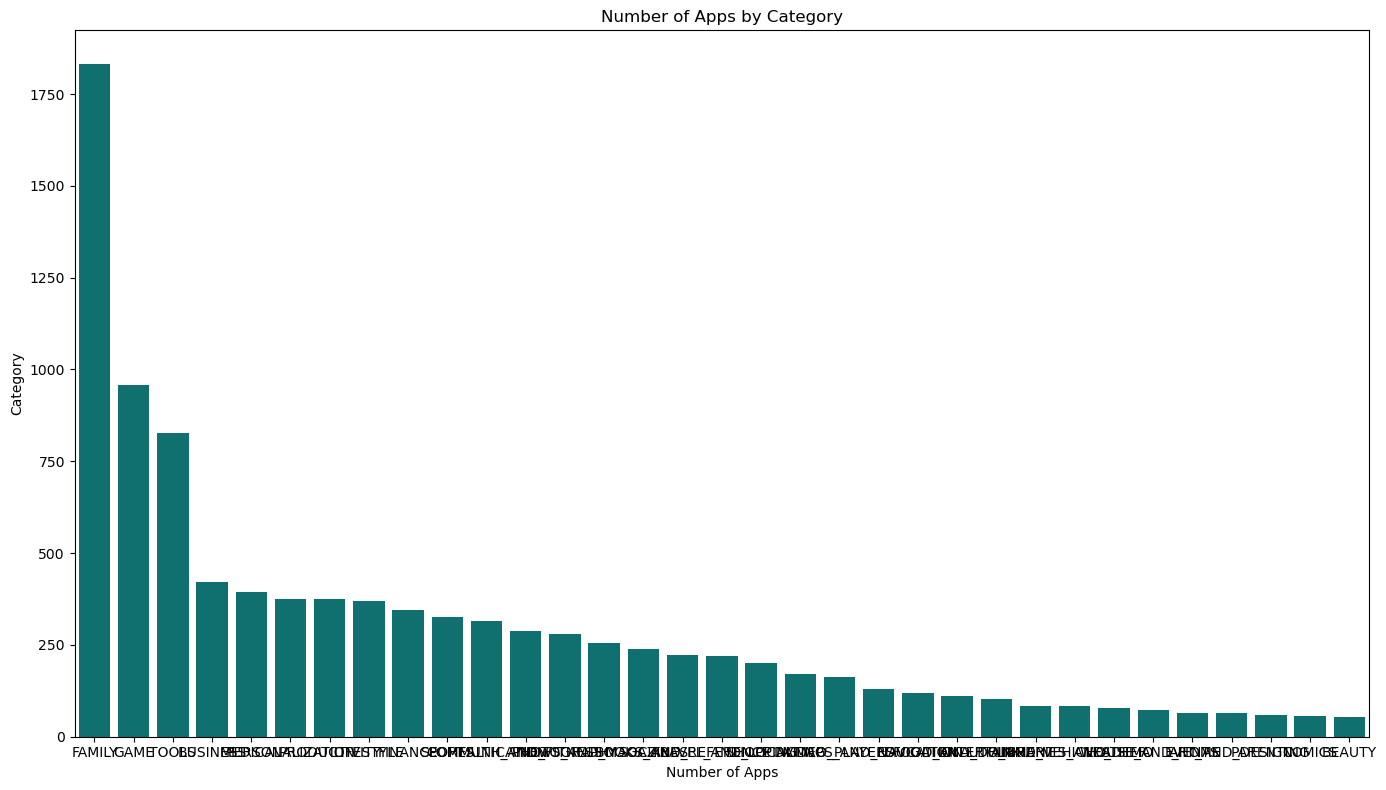

In [60]:
# Check the Category column and clean the data
if 'Category' not in apps_data.columns:
    raise ValueError("The column 'Category' does not exist in the data. Please check the column names.")

# Drop rows where 'Category' column has missing values
apps_data = apps_data.dropna(subset=['Category'])

# Count the number of apps in each category
category_counts = apps_data['Category'].value_counts()
category_counts_apps_data = category_counts.reset_index()
category_counts_apps_data.columns = ['Category', 'Number of Apps']


# Visualization: Bar plot for app distribution across categories
plt.figure(figsize=(14, 8))
sns.barplot(x='Category', y='Number of Apps', data=category_counts_apps_data, color='teal')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Distribution of Apps Across Categories')
plt.tight_layout()
plt.show()

# Visualization: Pie chart for app distribution across categories
plt.figure(figsize=(10, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(category_counts)))
plt.title('Distribution of Apps Across Categories')
plt.show()

# Optional: Visualization of app counts by category with a countplot
plt.figure(figsize=(14, 8))
sns.barplot(x='Category', y='Number of Apps', data=category_counts_apps_data, color='teal')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.title('Number of Apps by Category')
plt.tight_layout()
plt.show()

#### Skill Enhancement

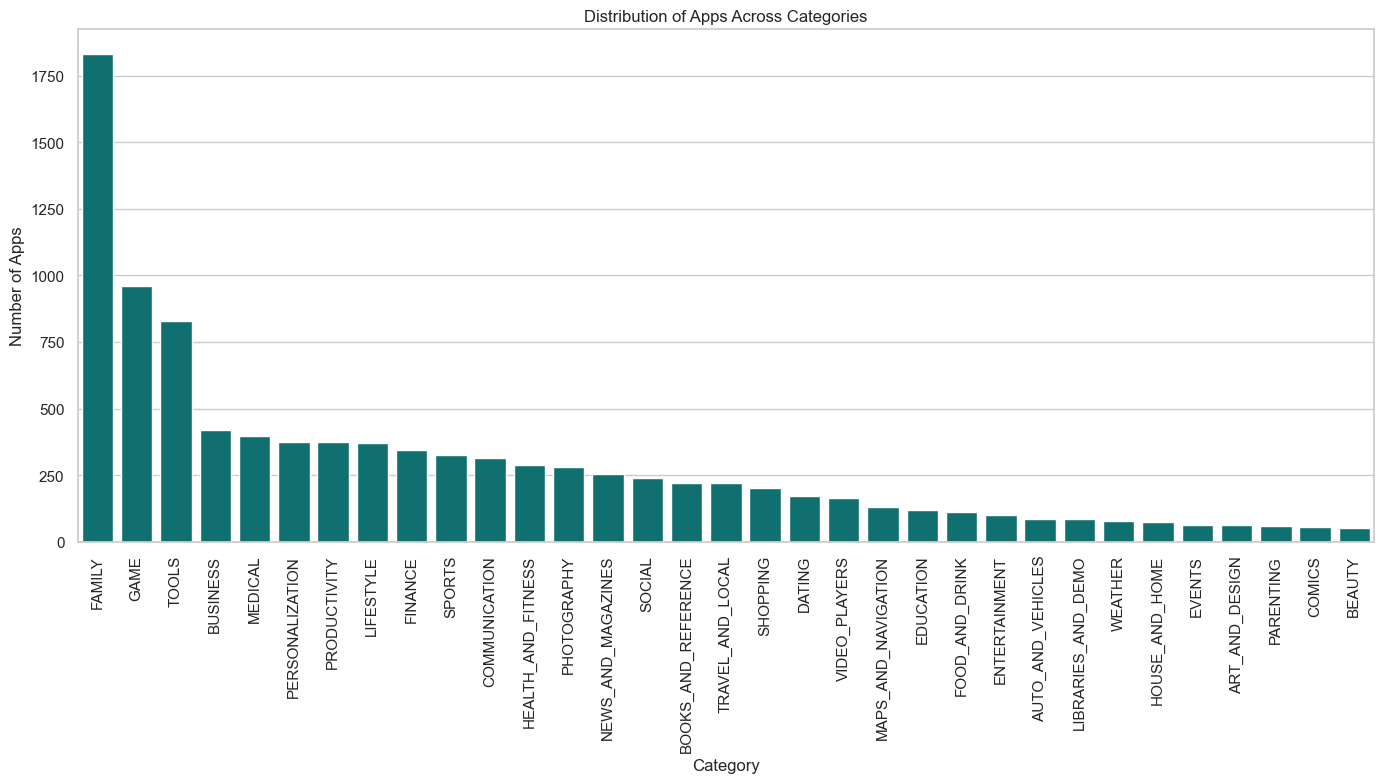

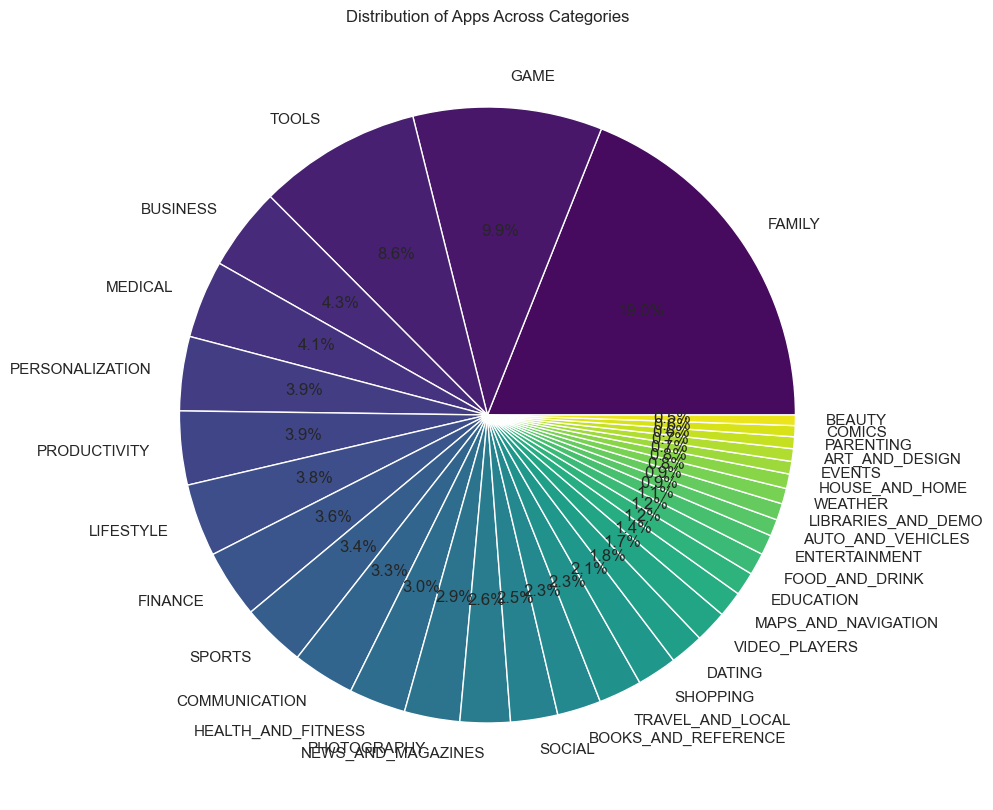

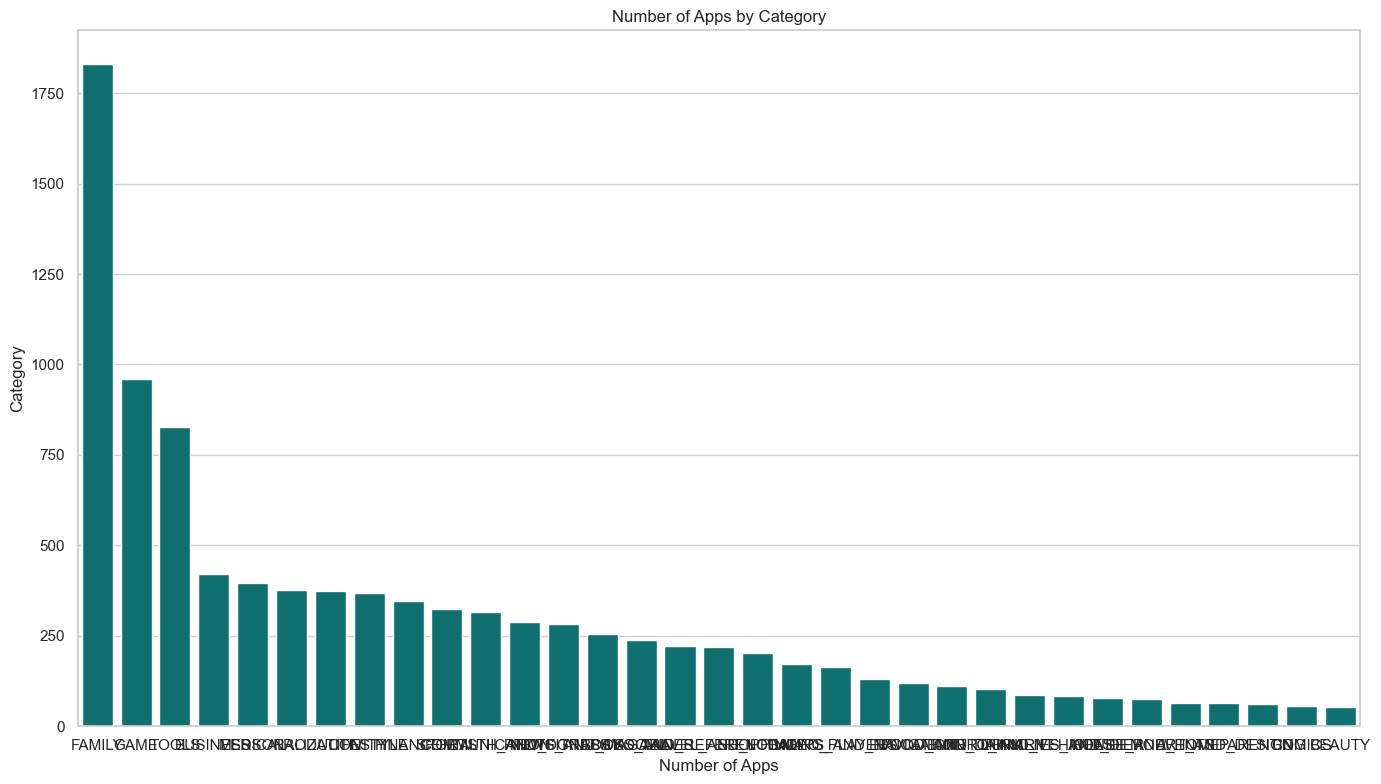

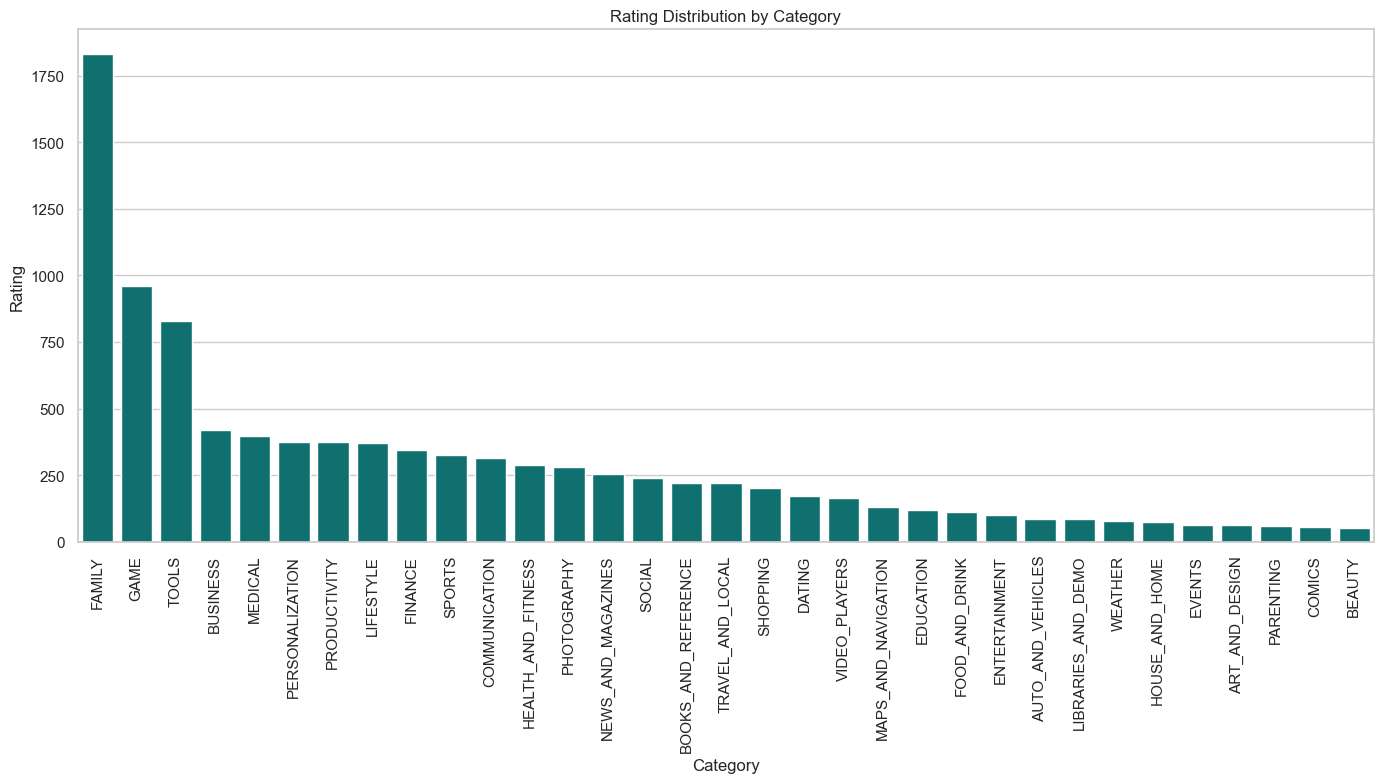

In [63]:
# Check the Category column and clean the data
if 'Category' not in apps_data.columns:
    raise ValueError("The column 'Category' does not exist in the data. Please check the column names.")

# Drop rows where 'Category' column has missing values
apps_data = apps_data.dropna(subset=['Category'])

# Count the number of apps in each category
category_counts = apps_data['Category'].value_counts()
category_counts_apps_data = category_counts.reset_index()
category_counts_apps_data.columns = ['Category', 'Number of Apps']


# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Visualization 1: Bar Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Category', y='Number of Apps', data=category_counts_apps_data, color='teal')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Distribution of Apps Across Categories')
plt.tight_layout()
plt.show()

# Visualization 2: Pie Chart
plt.figure(figsize=(10, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(category_counts)))
plt.title('Distribution of Apps Across Categories')
plt.show()

# Visualization 3: Horizontal Bar Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Category', y='Number of Apps', data=category_counts_apps_data, color='teal')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.title('Number of Apps by Category')
plt.tight_layout()
plt.show()

# Visualization 4: Box Plot (if there's a numerical feature to compare across categories)
# Example assumes there's a 'Rating' column to compare
if 'Rating' in apps_data.columns:
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Category', y='Number of Apps', data=category_counts_apps_data, color='teal')
    plt.xticks(rotation=90)
    plt.xlabel('Category')
    plt.ylabel('Rating')
    plt.title('Rating Distribution by Category')
    plt.tight_layout()
    plt.show()